<a href="https://colab.research.google.com/github/kushalBanda/kushalBanda/blob/main/NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ***`Corpus - News Commentary`***

In [29]:
import resource
import os

file_name = "/content/NLP_Corpus.txt"

print(f'File Size is {os.stat(file_name).st_size / (1024 * 1024)} MB')

txt_file = open(file_name)

count = 0

for line in txt_file:
    # we can process file line by line here, for simplicity I am taking count of lines
    count += 1

txt_file.close()

print(f'Number of Lines in the file is {count}')

print('Peak Memory Usage =', resource.getrusage(resource.RUSAGE_SELF).ru_maxrss)
print('User Mode Time =', resource.getrusage(resource.RUSAGE_SELF).ru_utime)
print('System Mode Time =', resource.getrusage(resource.RUSAGE_SELF).ru_stime)

File Size is 0.06438541412353516 MB
Number of Lines in the file is 1683
Peak Memory Usage = 3587064
User Mode Time = 524.174663
System Mode Time = 23.582845


# ***Importing Libraries***

In [30]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [31]:
file = open("/content/NLP_Corpus.txt", "r")
rawReadCorpus = file.read()
print ("Total no. of characters in read dataset: {}".format(len(rawReadCorpus)))

Total no. of characters in read dataset: 65829


In [32]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Text Vectorization 

In [33]:
# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [34]:
rawReadCorpus

'\ufeff[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\n\nCHAPTER I. Down the Rabbit-Hole\n\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is the use of a book,\' thought Alice \'without pictures or\nconversation?\'\n\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, \'Oh dear!\nOh dear! I shall be late!\' (when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at t

In [35]:
# Fit the text vectorizer to the training data
# adapt : Fits the state of the preprocessing layer to the dataset
text_vectorizer.adapt([rawReadCorpus])

In [36]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # Get all the unique words 
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words= words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 1825
5 most common words: ['', '[UNK]', 'the', 'and', 'to']
5 least common words: ['absurd', 'above', 'able', 'abide', '1865']


# Most Common Words

In [39]:
from collections import Counter

%timeit 
c = Counter(rawReadCorpus.split())
most_common_words = c.most_common(20)

In [40]:
most_common_words

[('the', 566),
 ('to', 368),
 ('and', 361),
 ('a', 302),
 ('she', 283),
 ('of', 221),
 ('was', 179),
 ('it', 175),
 ('in', 163),
 ('I', 156),
 ('said', 128),
 ('as', 116),
 ('her', 109),
 ('that', 109),
 ('you', 104),
 ('Alice', 99),
 ('at', 83),
 ('had', 82),
 ('be', 79),
 ('for', 73)]

In [41]:
words = []
count = []
for i in most_common_words:
  words.append(i[0])
  count.append(i[1])

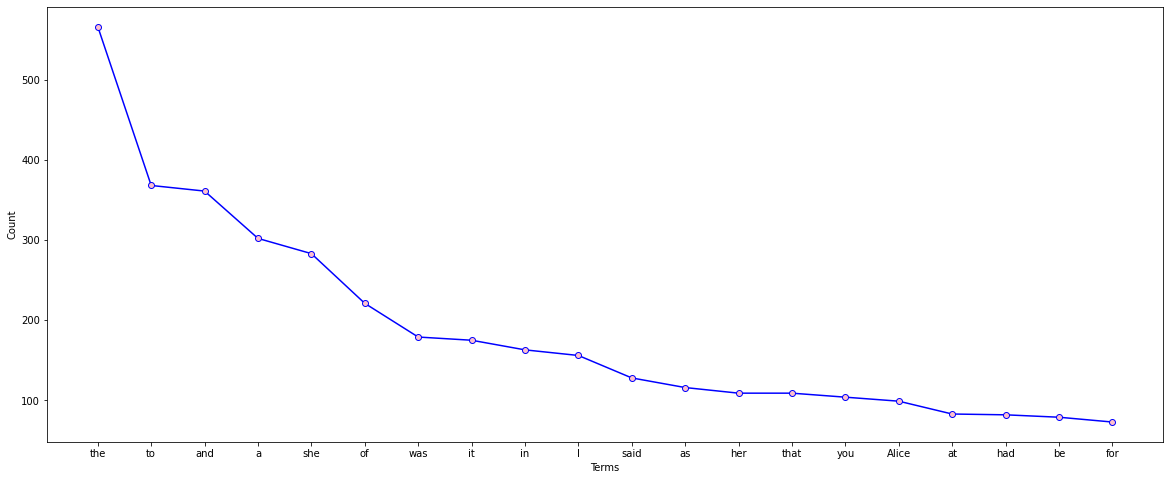

In [42]:
plt.figure(figsize = (20 , 8))
plt.plot(words , count, color = 'blue' , marker = 'o' , mfc = 'pink')

plt.xlabel("Terms")
plt.ylabel("Count")
plt.show()

# Zip's Law 
* According to Zipf's law, the frequency of a given word is dependent on the inverse of it's rank.
f(r, α) ∝ 1/r^α
Here,

α ≈ 1
r = rank of a word
f(r, α) = frequency in the corpus

In [43]:
from operator import itemgetter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
tokenlist = word_tokenize(rawReadCorpus)

In [46]:
frequency = {}
words_doc = nltk.Text(tokenlist)
stop_words = set(stopwords.words('english'))

# %% Convert to lower case and remove stop words
words_doc = [word.lower() for word in words_doc if word.isalpha()]
words_doc = [word for word in words_doc if word not in stop_words]

# %% Calculate the frequency of the words inside
for word in words_doc :
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

       Rank Frequency Frequency * Rank
alice     1       163              163
said      2       140              280
little    3        78              234
one       4        48              192
like      5        42              210


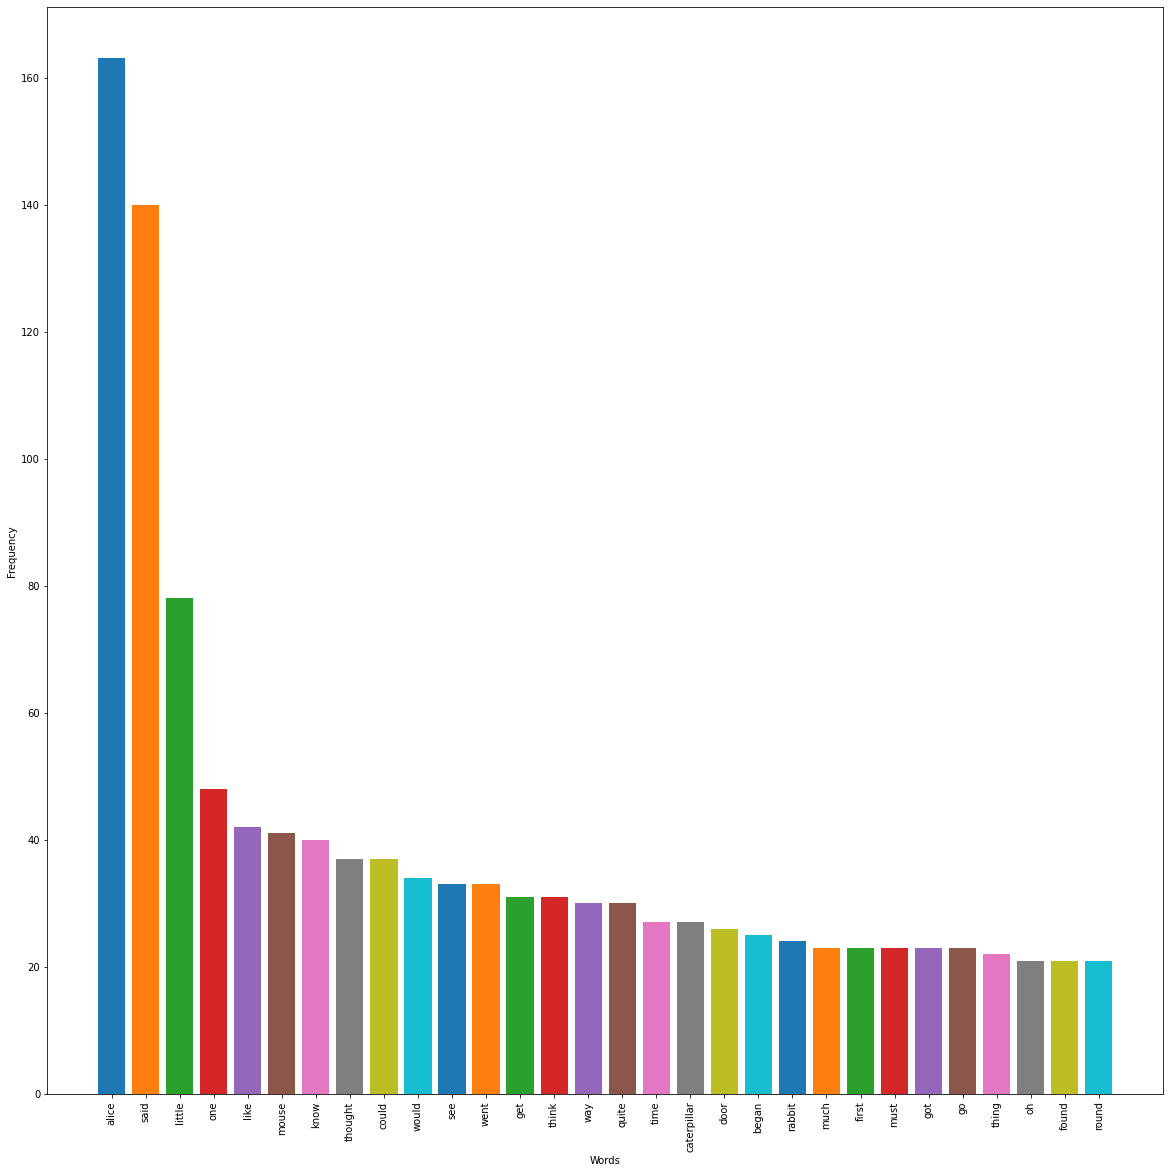

In [47]:
# %%Creating a table for frequency * rank

for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1
    
print (df.head())

plt.figure(figsize=(20,20))  
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    

for word , freq in collection[:30]:
    plt.bar(word, freq)    
plt.show()


We can see a large gap in their ranks. If we see the value of 'Frequency * Rank' (which is k), you can see that most of the values are nearly similar.
## ***`Therefore it follows 'Zirf's Law'.`***

# Collocations - Collocations are two or more words that tend to appear frequently together.

In [49]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [50]:
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [51]:
words = [w.lower() for w in webtext.words('/content/NLP_Corpus.txt')]

biagram_collocation = BigramCollocationFinder.from_words(words)
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)


[(',', 'and'),
 ('*', '*'),
 ("'", 't'),
 ("'", 's'),
 (",'", 'said'),
 ('.', "'"),
 ("'", 'll'),
 ("'", 'm'),
 ('said', 'alice'),
 ('said', 'the'),
 ('i', "'"),
 ('a', 'little'),
 ('she', 'had'),
 ('went', 'on'),
 ('to', 'be')]

In [54]:
import string

In [87]:
biagram_collocation = BigramCollocationFinder.from_words(words)
Bi_Collocation = biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)
Bi_Collocation

[(',', 'and'),
 ('*', '*'),
 ("'", 't'),
 ("'", 's'),
 (",'", 'said'),
 ('.', "'"),
 ("'", 'll'),
 ("'", 'm'),
 ('said', 'alice'),
 ('said', 'the'),
 ('i', "'"),
 ('a', 'little'),
 ('she', 'had'),
 ('went', 'on'),
 ('to', 'be')]

In [52]:
from nltk.corpus import stopwords

stopset = set(stopwords.words('english'))
filter_stops = lambda w: len(w) < 3 or w in stopset

biagram_collocation.apply_word_filter(filter_stops)
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)


[('said', 'alice'),
 ('white', 'kid'),
 ('kid', 'gloves'),
 ('golden', 'key'),
 ('mary', 'ann'),
 ('yer', 'honour'),
 ('thought', 'alice'),
 ('poor', 'alice'),
 ('right', 'size'),
 ('inches', 'high'),
 ('another', 'moment'),
 ('play', 'croquet'),
 ('one', 'side'),
 ('good', 'deal'),
 ('feet', 'high')]

In [53]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

words = [w.lower() for w in webtext.words('/content/NLP_Corpus.txt')]

trigram_collocation = TrigramCollocationFinder.from_words(words)
trigram_collocation.apply_word_filter(filter_stops)
trigram_collocation.apply_freq_filter(3)

trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15)


[('white', 'kid', 'gloves'),
 ('little', 'golden', 'key'),
 ('thought', 'poor', 'alice'),
 ('cats', 'eat', 'bats'),
 ('poor', 'little', 'thing')]

# ***Language Model***
Language models form the backbone of Natural Language Processing. They are a way of transforming qualitative information about text into quantitative information that machines can understand. 

In [97]:
import string
string.punctuation = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—'
string.punctuation = string.punctuation.replace('.', '')
file = open('/content/NLP_Corpus.txt').read()
#preprocess data to remove newlines and special characters
file_new = ""
for line in file:
    line_new = line.replace("n", " ")      
    file_new += line_new
preprocessedCorpus = "".join([char for char in file_new if char not in string.punctuation])

In [100]:
sentences = sent_tokenize(preprocessedCorpus)
print("List 5 sentences of preprocessed corpus are : ")
print(sentences[0:5])
words = word_tokenize(preprocessedCorpus)
print("List 5 words/tokens of preprocessed corpus are : ")
print(words[0:5])

List 5 sentences of preprocessed corpus are : 
['\ufeffAlices Adve tures i  Wo derla d by Lewis Carroll 1865\n\n\nCHAPTER I. Dow  the RabbitHole\n\n\nAlice was begi  i g to get very tired of sitti g by her sister o  the\nba k a d of havi g  othi g to do o ce or twice she had peeped i to the\nbook her sister was readi g but it had  o pictures or co versatio s i \nit a d what is the use of a book thought Alice without pictures or\nco versatio \n\n\nSo she was co sideri g i  her ow  mi d as well as she could for the\nhot day made her feel very sleepy a d stupid whether the pleasure\nof maki g a daisychai  would be worth the trouble of getti g up a d\npicki g the daisies whe  sudde ly a White Rabbit with pi k eyes ra \nclose by her.', 'There was  othi g so VERY remarkable i  that  or did Alice thi k it so\nVERY much out of the way to hear the Rabbit say to itself Oh dear\nOh dear I shall be late whe  she thought it over afterwards it\noccurred to her that she ought to have wo dered at this

In [101]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in words if not w.lower() in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
from collections import Counter
from nltk.util import ngrams
unigrams=[]
bigrams=[]
trigrams=[]
for content in (sentences): # *** Write code ***
    content = content.lower()
    content = word_tokenize(content)
    for word in content:
        if (word =='.'):
            content.remove(word) 
        else:
            unigrams.append(word)
    bigrams.extend(ngrams(content,2))
    ##similar for trigrams 
    # *** Write code ***
    trigrams.extend(ngrams(content,3))
print ("Sample of n-grams:n" + "-------------------------")
print ("--> UNIGRAMS: n" + str(unigrams[:5]) + " ...n")
print ("--> BIGRAMS: n" + str(bigrams[:5]) + " ...n")
print ("--> TRIGRAMS: n" + str(trigrams[:5]) + " ...n")

Sample of n-grams:n-------------------------
--> UNIGRAMS: n['\ufeffalices', 'adve', 'tures', 'i', 'wo'] ...n
--> BIGRAMS: n[('\ufeffalices', 'adve'), ('adve', 'tures'), ('tures', 'i'), ('i', 'wo'), ('wo', 'derla')] ...n
--> TRIGRAMS: n[('\ufeffalices', 'adve', 'tures'), ('adve', 'tures', 'i'), ('tures', 'i', 'wo'), ('i', 'wo', 'derla'), ('wo', 'derla', 'd')] ...n


In [104]:
def stopwords_removal(n, a):     
    b = []
    if n == 1:
        for word in a:
            count = 0
            if word in stop_words:
                count = 0
            else:
                count = 1
            if (count==1):
                b.append(word)
        return(b)
    else:
        for pair in a:
            count = 0
            for word in pair:
                if word in stop_words:
                    count = count or 0
                else:
                    count = count or 1
            if (count==1):
                b.append(pair)
        return(b)
unigrams_Processed = stopwords_removal(1,unigrams)
bigrams_Processed = stopwords_removal(2,bigrams)
trigrams_Processed = stopwords_removal(3,trigrams)
print ("Sample of n-grams after processing:n" + "-------------------------")
print ("--> UNIGRAMS: n" + str(unigrams_Processed[:5]) + " ...n")
print ("--> BIGRAMS: n" + str(bigrams_Processed[:5]) + " ...n")
print ("--> TRIGRAMS: n" + str(trigrams_Processed[:5]) + " ...n")

Sample of n-grams after processing:n-------------------------
--> UNIGRAMS: n['\ufeffalices', 'adve', 'tures', 'wo', 'derla'] ...n
--> BIGRAMS: n[('\ufeffalices', 'adve'), ('adve', 'tures'), ('tures', 'i'), ('i', 'wo'), ('wo', 'derla')] ...n
--> TRIGRAMS: n[('\ufeffalices', 'adve', 'tures'), ('adve', 'tures', 'i'), ('tures', 'i', 'wo'), ('i', 'wo', 'derla'), ('wo', 'derla', 'd')] ...n


In [1]:
def get_ngrams_freqDist(n, ngramList):
    ngram_freq_dict = {}
    for ngram in ngramList:
        if ngram in ngram_freq_dict:
            ngram_freq_dict[ngram] += 1
        else:
            ngram_freq_dict[ngram] = 1
    return ngram_freq_dict
unigrams_freqDist = get_ngrams_freqDist(1, unigrams)
unigrams_Processed_freqDist = get_ngrams_freqDist(1, unigrams_Processed)
bigrams_freqDist = get_ngrams_freqDist(2, bigrams)
bigrams_Processed_freqDist = get_ngrams_freqDist(2, bigrams_Processed)
trigrams_freqDist = get_ngrams_freqDist(3, trigrams)
trigrams_Processed_freqDist = get_ngrams_freqDist(3, trigrams_Processed)

NameError: ignored

In [ ]:
smoothed_bigrams_probDist = {}
V = len(unigrams_freqDist)
for i in bigrams_freqDist:
    smoothed_bigrams_probDist[i] = (bigrams_freqDist[i] + 1)/(unigrams_freqDist[i[0]]+V)
smoothed_trigrams_probDist = {}
for i in trigrams_freqDist:
    smoothed_trigrams_probDist[i] = (trigrams_freqDist[i] + 1)/(bigrams_freqDist[i[0:2]]+V)

In [107]:
smoothed_bigrams_probDist

{('\ufeffalices', 'adve'): 0.0011627906976744186,
 ('adve', 'tures'): 0.0011627906976744186,
 ('tures', 'i'): 0.0011627906976744186,
 ('i', 'wo'): 0.007249660172179429,
 ('wo', 'derla'): 0.0011435105774728416,
 ('derla', 'd'): 0.0011627906976744186,
 ('d', 'by'): 0.000882223202470225,
 ('by', 'lewis'): 0.001146131805157593,
 ('lewis', 'carroll'): 0.0011627906976744186,
 ('carroll', '1865'): 0.0011627906976744186,
 ('1865', 'chapter'): 0.0011627906976744186,
 ('chapter', 'i.'): 0.0011594202898550724,
 ('i.', 'dow'): 0.0011627906976744186,
 ('dow', 'the'): 0.005016722408026756,
 ('the', 'rabbithole'): 0.0012690355329949238,
 ('rabbithole', 'alice'): 0.0011614401858304297,
 ('alice', 'was'): 0.003727369542066028,
 ('was', 'begi'): 0.001566579634464752,
 ('begi', 'i'): 0.0028968713789107765,
 ('i', 'g'): 0.01359311282283643,
 ('g', 'to'): 0.02378731343283582,
 ('to', 'get'): 0.008372093023255815,
 ('get', 'very'): 0.001142857142857143,
 ('very', 'tired'): 0.0022396416573348264,
 ('tired', 

In [108]:
testSent1 = "There was a sudden jerk, a terrific convulsion of the limbs; and there he"
testSent2 = "The hungry and destitute situation of the infant orphan was duly reported by"

In [121]:
token_1 = word_tokenize(testSent1)
token_2 = word_tokenize(testSent2)
token_3 = word_tokenize(testSent3)
ngram_1 = {1:[], 2:[]}    
ngram_2 = {1:[], 2:[]}
ngram_3 = {1:[], 2:[]}
for i in range(2):
    ngram_1[i+1] = list(ngrams(token_1, i+1))[-1]
    ngram_2[i+1] = list(ngrams(token_2, i+1))[-1]
    ngram_3[i+1] = list(ngrams(token_3, i+1))[-1]
print("Sentence 1: ", ngram_1,"nSentence 2: ",ngram_2,"nSentence 3: ",ngram_3)

Sentence 1:  {1: ('he',), 2: ('there', 'he')} nSentence 2:  {1: ('down',), 2: ('sat', 'down')} nSentence 3:  {1: ('by',), 2: ('reported', 'by')}


In [140]:
def predict_next_word(last_word,probDist):
    next_word = {}
    for k in probDist:
        if k[0] == last_word[0]:
            next_word[k[1]] = probDist[k]
    k = Counter(next_word)
    high = k.most_common(1) 
    return high[0]

def predict_next_3_words(token,probDist):
    pred1 = []
    pred2 = []
    next_word = {}
    for i in probDist:
        if i[0] == token:
            next_word[i[1]] = probDist[i]
    k = Counter(next_word)
    high = k.most_common(2) 
    w1a = high[0]
    w1b = high[1]
    w2a = predict_next_word(w1a,probDist)
    w3a = predict_next_word(w2a,probDist)
    w2b = predict_next_word(w1b,probDist)
    w3b = predict_next_word(w2b,probDist)
    pred1.append(w1a)
    pred1.append(w2a)
    pred1.append(w3a)
    pred2.append(w1b)
    pred2.append(w2b)
    pred2.append(w3b)
    return pred1,pred2
print("Predicting next 3 possible word sequences with smoothed bigram model : ")


pred1,pred2 = predict_next_3_words(ngram_1[1][0],smoothed_bigrams_probDist)
print(testSent1 + " " + pred1[0][0]+" "+pred1[1][0]+" "+pred1[2][0])
print(testSent1 + " " + pred2[0][0]+" "+pred2[1][0]+" "+pred2[2][0])

pred1,pred2 = predict_next_3_words(ngram_2[1][0],smoothed_bigrams_probDist)
print(testSent3 + " " + pred1[0][0]+" "+pred1[1][0]+" "+pred1[2][0])
print(testSent3 + " " + pred2[0][0]+" "+pred2[1][0]+" "+pred2[2][0])

Predicting next 3 possible word sequences with smoothed bigram model : 
There was a sudden jerk, a terrific convulsion of the limbs; and there he was a d
There was a sudden jerk, a terrific convulsion of the limbs; and there he came upo a
The hungry and destitute situation of the infant orphan was duly reported by the mouse was
The hungry and destitute situation of the infant orphan was duly reported by this time to
